Before we start, just run the cell below to ignore unnecessary warnings for now. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Basic Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [3]:
%matplotlib notebook

## Import the MNIST Dataset

This dataset is ubiquitous in ML and easily found in many machine learning libraries. We'll load it from `keras`.

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Data exploration

We'll begin with inspecting the dataset and see what it contains and what the distributions look like. It is always a good exercise to understand the data as much as possible before trying to create models to learn the mapping function. 

### Shape

The first thing to check in the dataset is the number of samples. Note that dataset you have just loaded is in the form of `NumPy` arrays.  

**Exercise**: Using the `.shape` attribute of `NumPy` arrays to see what the data looks like, and print out the following (the first one is already implemented below):

- The size of the training dataset
- The size of the test dataset
- The shape / form of each input sample in the dataset

In [6]:
print('Training Set:', x_train.shape, y_train.shape)
print('Test Set:', x_test.shape, y_test.shape)
print('Shape of input sample:', x_train[0].shape)

Training Set: (60000, 28, 28) (60000,)
Test Set: (10000, 28, 28) (10000,)
Shape of input sample: (28, 28)


### Visualise

Plot some randomly selected samples from the train and test sets to see what the dataset looks like. You can use `matplotlib` to display these images. Below is a snippet to display 25 randomly chosen samples from each set. Run it a few times to get a sense of what these images look like. 

In [7]:
# Visualise the training set

n = 25

plt.figure()
ixs = np.random.randint(x_train.shape[0], size=n)
for i, ix in enumerate(ixs):
    ax = plt.subplot(math.sqrt(n), math.sqrt(n), i + 1, frameon=False)
    ax.axis('off')
    ax.imshow(x_train[ix], cmap='gray')
    ax.title.set_text(str(y_train[ix]))
plt.subplots_adjust(hspace=0.75)

<IPython.core.display.Javascript object>

In [8]:
# Visualise the test set

n = 25

plt.figure()
ixs = np.random.randint(x_test.shape[0], size=n)
for i, ix in enumerate(ixs):
    ax = plt.subplot(math.sqrt(n), math.sqrt(n), i + 1, frameon=False)
    ax.axis('off')
    ax.imshow(x_test[ix], cmap='gray')
    ax.title.set_text(str(y_test[ix]))
plt.subplots_adjust(hspace=0.75)

<IPython.core.display.Javascript object>

### Distributions

In addition to actually visualising the data, it is useful to see some statistics on the data. In this dataset, it is useful to see how examples from each _category_ (from each digit) are distributed using a histogram. 

**Exercise**: Below is a snippet of code to plot a histogram (using `seaborn` and `matplotlib`) accross the 10 _categories_ for the training set. Do the same for the test dataset. 

In [9]:
# Training set distribution

plt.figure()
plt.title('Histogram: Training Set')
sns.countplot(y_train)

<IPython.core.display.Javascript object>

In [10]:
# Test set distribution

plt.figure()
plt.title('Histogram: Test Set')
sns.countplot(y_test)

<IPython.core.display.Javascript object>

**Question**: How do the two histograms compare to each other?

**Answer**: They look extremely similar in mode the sample input images and the histograms accross the 10 categories. This is a good as it implies that the data is similarly distributed between training and test sets. 

## Task 

Now that we're familiar with the dataset, we can turn our attention to the task at hand. As you may have guessed, your job is to create a model that can predict the digit corresponding to every input image. 

We'll train several models for this task starting from simple baselines to more advanced ones that are more suitable for this task. This is an example of Supervised Learning as we have a labelled training set. 

**Question**: Is this a categorical or a regressive task? 

**Answer**: Categorical

### Baseline: Logistic Regression

Logistic Regression is one of the simplest models one can use for a classification task. Here, we'll use a multiple classes version of logistic regression (as opposed to the standard binary classification). 

For this exercise, we'll use `scikit-learn` which is a good starting point for baseline models these days. 

#### Load the Dataset

It's good to load the dataset again, just to ensure that there aren't modifications from the previous exercices that got carried over. 

**Exercise**: Load the dataset again.

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#### Preprocess the data

It is often necessary to process your data before passing it to your model. This may involve normalisation, adjusting the shape, etc. 

In this case, we need to flatten the images. As we already saw, every sample in `x_train` and `x_test` is shaped `28x28`. However, logistic regression needs 1d array for every sample instead of a 2d array. 

In [12]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [13]:
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


#### Create the Model

**Exercise**: Use `scikit-learn`'s `LogisticRegression` to create the model and store it in `logistic_regression`. 

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Question**: How many parameters are in the model?

**Answer**: 8624

#### Training the model

**Exercise**: Use the `fit(x, y)` function on `logisitic_regression` to train the model. 

In [15]:
_ = logistic_regression.fit(x_train_flat, y_train)

#### Model Evaluation

We will use the following analysis for each model. We have provided the code for LR. You should understand the code and be able to reuse it for the NNs as the analysis would be the same.

**Exercise**: Calculate the performance of `logistic_regression` using the `score(x, y)` function.

In [16]:
logistic_regression.score(x_test_flat, y_test)

0.9255

An accuracy of over 92\% is not bad at all for such a simple model and this shows how good simple models can be sometimes very performant. However, one can do significantly better with the MNIST dataset using MLPs and CNNs. 

Let us first see examples of where the model fails and where it succeeds. This will better highlight the _need_ for more complexity and smarter designs. 

**Exercise**: Use the `predict(x)` function from `logistic_regression` to get the predictions from the model for the test set.

**Exercise**: Use the `predict_proba(x)` function from `logistic_regression` to get the predicted probabilities for the test set. These will be useful for analysing failure cases.

In [17]:
predictions = logistic_regression.predict(x_test_flat)
predicted_probs = logistic_regression.predict_proba(x_test_flat)

The cell below extracts out the positions of examples that produce different output as compared with the ground truth.

In [18]:
failures = np.argwhere(predictions != y_test).squeeze()
successes = np.argwhere(predictions == y_test).squeeze()

In [19]:
print(f'Failure Cases: {len(failures)}/{len(predictions)}')
print(f'Successes: {len(successes)}/{len(predictions)}')

Failure Cases: 745/10000
Successes: 9255/10000


#### Analysing the failures

By displaying examples from the test set where the model fails, we're in a much better position to understand the shortcomings and address them. Below we choose 25 random samples from the list of the failures. We can also see the probabilities predicted for a sample (randomly chosen). Run both the cells below a few times to get a sense of where and how the model fails. 

In [20]:
plt.figure()
plt.title('Failures')

n = 25
ixs = np.random.choice(failures, size=n)
for i, ix in enumerate(ixs):
    ax = plt.subplot(math.sqrt(n), math.sqrt(n), i + 1, frameon=False)
    ax.axis('off')
    ax.imshow(x_test[ix], cmap='gray')
    ax.title.set_text(f'{y_test[ix]} vs {predictions[ix]}')
plt.subplots_adjust(hspace=0.75)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


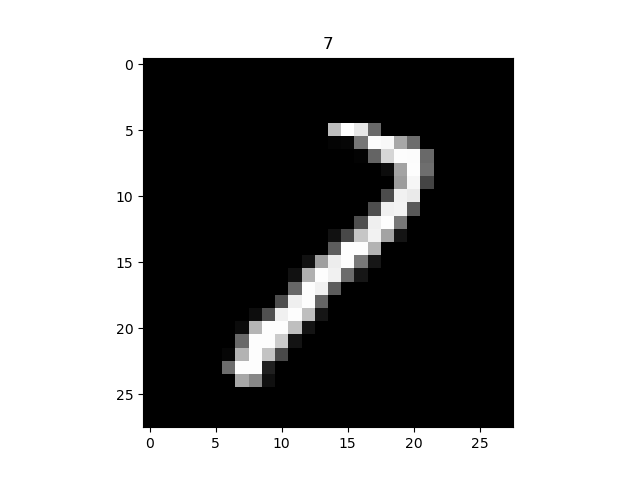

<IPython.core.display.Javascript object>


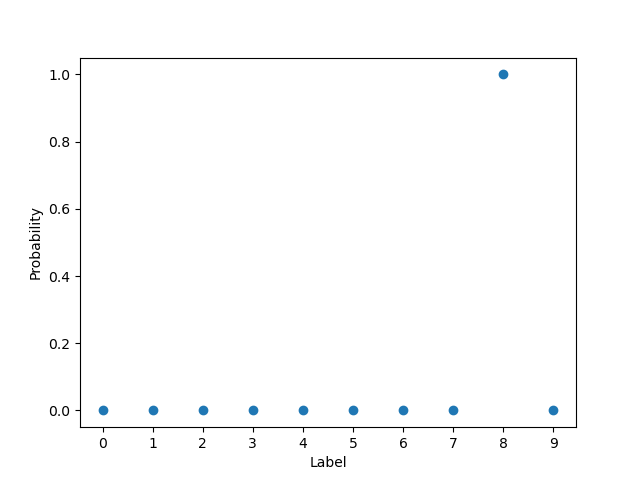

In [48]:
ix = np.random.choice(failures)

# Show the image
plt.figure()
plt.title(str(y_test[ix]))
plt.imshow(x_test[ix], cmap='gray')

# Plot the corresponding output probabilities
plt.figure()
plt.plot(predicted_probs[ix], 'o')
plt.xlabel('Label')
plt.ylabel('Probability')
_ = plt.xticks(range(10))

**Question**: Do you think we can train a better model? 

**Answer**: Likely - looking at the failure cases, the images look slightly different but one can still recognise what digit they actually represent. If we can tell the difference, perhaps we can get AI to differentiate as well? Moreover, if one closely examines the probabilities, often it appears that even on failure, there is still some probability present on the correct digit. This probably implies that the model is lacking in sophistication and would probably benefit from complexity.

### Model 1: Multi Layer Perceptron (MLP)

We will now try some neural network based models. We'll use `keras`, a simple and useful deep learning library, for creating both the MLPs and the CNNs.

In [22]:
import keras

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#### Load the Dataset

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#### Preprocess the data

Just like in LR, MLPs need the input flattened. 

**Exercise**: Flatten the input. 

In [25]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

#### Create the Model

`keras` makes it extremely easy the compose neural network layers and make architectures as you desire very easily. Below is a simple architecture already implemented with a fully connected layer of size 1024, the relu activation function, and a dropout layer to help the training. 

**Exercise**: Train the model on the simple architecture and perform analysis similar to what we did for LR. 

**Exercise**: Repeat the process for the following architecture: 
- Layer 1: Fully connected layer of size 1024 with relu activation.
- Layer 2: Dropout of 0.25.
- Layer 3: Fully connected layer of size 512 with relu activation. Note that unlike in the first layer, you no longer need to specify the `input_dim` as `keras` will be able to infer it from the previous layer. This is true for all subsequent layers (if any) as well. 
- Layer 4: Dropout of 0.25

**Exercise**: Try using a different activation function.

**Exercise**: Create your own architecture and repeat the same process. 

In [26]:
model = Sequential(name='MLP')

# Layer 1
model.add(Dense(1024, input_dim=784, activation='relu'))

# Layer 2
model.add(Dropout(0.25))

# Layer 3
model.add(Dense(512, activation='relu'))

# Layer 4
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(10, activation='softmax'))

We now need to compile the model. This means assembling all the layers together, telling the model which loss function to use, which optimizer to use, and which metric to use for the score. 

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


Note the difference in the number of parameters in these neural networks compared with the number in our logistic regression baseline. 

#### Training the model

Fit the model. Remember to convert the labels into a one hot encoded format (scikit-learn did this internally for us, but we'll have to be more specific here)! You can use `keras.utils.to_categorical` for that. 

**Question**: Can you remember why one-hot encoding is better?

**Answer**: One-hot encoding is necessary for classification tasks.

We'll train for 12 epochs with a batch size of 128. Feel free to experiment with more epochs or different batch sizes. 

In [29]:
from keras.utils import to_categorical

In [30]:
model.fit(x_train_flat, to_categorical(y_train), epochs=12, batch_size=128)

Epoch 1/12
60000/60000 [==============================] - 5s 78us/step - loss: 14.5379 - acc: 0.0980
Epoch 2/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 3/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 4/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 5/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 6/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 7/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 8/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 9/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - acc: 0.0975
Epoch 10/12
60000/60000 [==============================] - 2s 35us/step - loss: 14.5463 - a

#### Model Evaluation

**Exercise**: Perform a similar analysis as in the logistic regression by:
- Checking the score on the test set
- Visualising failure cases
- Observing their output probability distributions

Note: Getting the predictions out of `keras` is slightly different as compared to `scikit-learn`. Use `model.predict` to get the `predicted_probs` and use `np.argmax(predicted_probs, axis=1)` to get the actual predictions. 

In [31]:
loss, score = model.evaluate(x_test_flat, to_categorical(y_test), verbose=0)
print(f'Loss: {loss} and Score: {score}')

Loss: 14.54819266052246 and Score: 0.0974


In [32]:
predicted_probs = model.predict(x_test_flat)
predictions = np.argmax(predicted_probs, axis=1)

In [33]:
failures = np.argwhere(predictions != y_test).squeeze()
successes = np.argwhere(predictions == y_test).squeeze()

In [34]:
print(f'Failure Cases: {len(failures)}/{len(predictions)}')
print(f'Successes: {len(successes)}/{len(predictions)}')

Failure Cases: 9026/10000
Successes: 974/10000


In [35]:
plt.figure()
plt.title('Failures')

n = 25
ixs = np.random.choice(failures, size=n)
for i, ix in enumerate(ixs):
    ax = plt.subplot(math.sqrt(n), math.sqrt(n), i + 1, frameon=False)
    ax.axis('off')
    ax.imshow(x_test[ix], cmap='gray')
    ax.title.set_text(f'{y_test[ix]} vs {predictions[ix]}')
plt.subplots_adjust(hspace=0.75)

<IPython.core.display.Javascript object>

In [36]:
ix = np.random.choice(failures)

# Show the image
plt.figure()
plt.title(str(y_test[ix]))
plt.imshow(x_test[ix], cmap='gray')

# Plot the corresponding output probabilities
plt.figure()
plt.plot(predicted_probs[ix], 'o')
plt.xlabel('Label')
plt.ylabel('Probability')
_ = plt.xticks(range(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model 2: Convolutional Neural Network (CNN)

We still have another model up our sleeves that is in general much more suitable for training models built for images. 

In [37]:
import keras

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.backend import image_data_format

#### Load the Dataset

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#### Preprocess the data

In [40]:
# Scale the input

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Below is a bit of a keras quirk. It is fine to skip over this for now as long as you execute this cell before moving on. 

Since images are generally in RGB format, one will normally have 3 "channels" in the image. Although, our input is only in greyscale, we still have to shape the input such that there is additional dimension for channels. 

In [41]:
# Shape the input

if image_data_format() == 'channels_first':
    x_train_conv = np.expand_dims(x_train, axis=1)
    x_test_conv = np.expand_dims(x_test, axis=1)
    input_shape = (1, 28, 28)
else:
    x_train_conv = np.expand_dims(x_train, axis=3)
    x_test_conv = np.expand_dims(x_test, axis=3)
    input_shape = (28, 28, 1)

#### Create the Model

The model we will train here will have the following hidden layers:
- Layer 1: 2D Convolution with a 3x3 kernel, relu activation and 32 filters.
- Layer 2: 2D Convolution with a 3x3 kernel, relu activation and 64 filters.
- Layer 3: 2D Max Pooling with a pool size of 2x2 kernal.
- Layer 4: Dropout of 0.25.
- Layer 5: Flatten. 
- Layer 6: Fully Connected Layer with 128 neurons. 
- Layer 7: Dropout of 0.5. 

**Exercise**: Fill in the missing layers

In [42]:
model = Sequential(name='CNN')

# Layer 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

# Layer 3
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Dropout(0.25))

# Layer 5
model.add(Flatten())

# Layer 6
model.add(Dense(128, activation='relu'))

# Layer 7
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [44]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(lr=1, rho=0.95), #lr or learning_rate depending on version
              metrics=['accuracy'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

Observe how despite having many more layers, the total number of parameters is less than the model in the MLP. Moreover, observe that most of the parameters are in the `Dense` layers rather than the `convolutional`. 

#### Training the model

**Exercise**: Fit the CNN to the training data.

In [46]:
from keras.utils import to_categorical

In [47]:
model.fit(x_train_conv, to_categorical(y_train), epochs=12, batch_size=128, verbose=1)

Epoch 1/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.2633 - acc: 0.9185
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0882 - acc: 0.9738
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0657 - acc: 0.9808
Epoch 4/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0531 - acc: 0.9840
Epoch 5/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0477 - acc: 0.9855
Epoch 6/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0416 - acc: 0.9870
Epoch 7/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0352 - acc: 0.9889
Epoch 8/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0332 - acc: 0.9898
Epoch 9/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0301 - acc: 0.9911
Epoch 10/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0285 - acc: 0.9910

#### Model Evaluation

**Exercise**: Perform a similar analysis as in the logistic regression by:
- Checking the score on the test set
- Visualising failure cases
- Observing their output probability distributions

In [49]:
loss, score = model.evaluate(x_test_conv, to_categorical(y_test), verbose=0)
print(f'Loss: {loss} and Score: {score}')

Loss: 0.024879640997503883 and Score: 0.9922


In [50]:
predicted_probs = model.predict(x_test_conv)
predictions = np.argmax(predicted_probs, axis=1)

In [51]:
failures = np.argwhere(predictions != y_test).squeeze()
successes = np.argwhere(predictions == y_test).squeeze()

In [52]:
print(f'Failure Cases: {len(failures)}/{len(predictions)}')
print(f'Successes: {len(successes)}/{len(predictions)}')

Failure Cases: 78/10000
Successes: 9922/10000


<IPython.core.display.Javascript object>


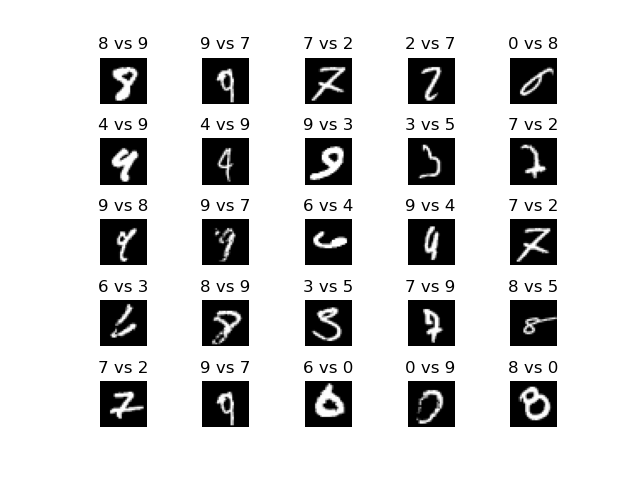

In [53]:
plt.figure()
plt.title('Failures')

n = 25
ixs = np.random.choice(failures, size=n)
for i, ix in enumerate(ixs):
    ax = plt.subplot(math.sqrt(n), math.sqrt(n), i + 1, frameon=False)
    ax.axis('off')
    ax.imshow(x_test[ix], cmap='gray')
    ax.title.set_text(f'{y_test[ix]} vs {predictions[ix]}')
plt.subplots_adjust(hspace=0.75)

<IPython.core.display.Javascript object>


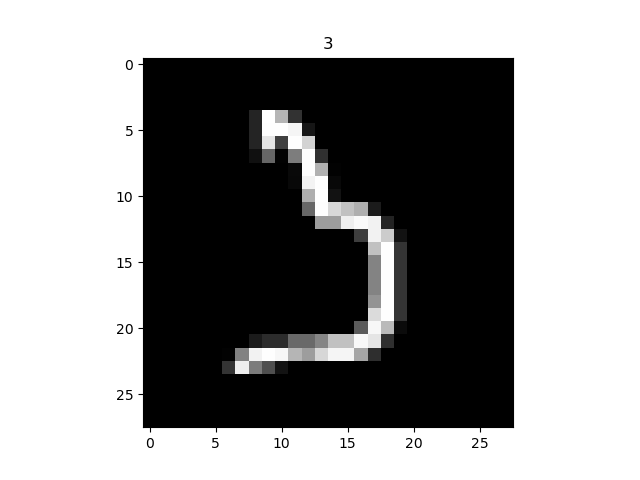

<IPython.core.display.Javascript object>


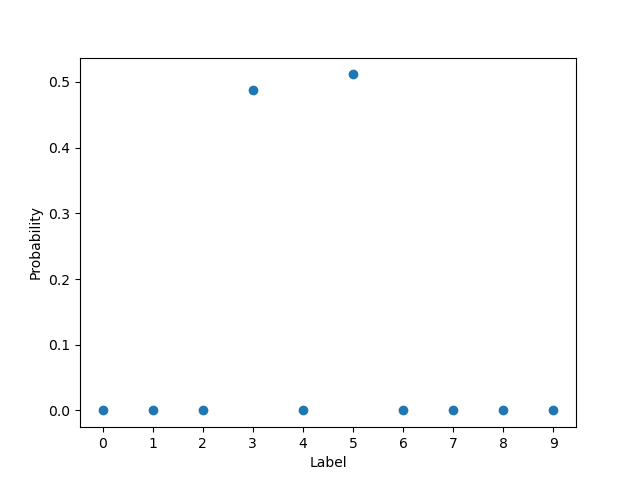

In [54]:
ix = np.random.choice(failures)

# Show the image
plt.figure()
plt.title(str(y_test[ix]))
plt.imshow(x_test[ix], cmap='gray')

# Plot the corresponding output probabilities
plt.figure()
plt.plot(predicted_probs[ix], 'o')
plt.xlabel('Label')
plt.ylabel('Probability')
_ = plt.xticks(range(10))